In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

### Paso 1: Carga del conjunto de datos
El conjunto de datos se puede encontrar en esta carpeta de proyecto bajo el nombre `housing.csv`. Puedes cargarlo en el código directamente desde el siguiente enlace:

In [2]:
df = pd.read_csv("../data/raw/internal-link (6).csv", sep=',')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


En este caso solo nos interesan las columnas `Latitude`, `Longitude` y `MedInc`.

In [3]:
df = df[['Latitude', 'Longitude', 'MedInc']]
df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


[Text(0, 0.5, '')]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

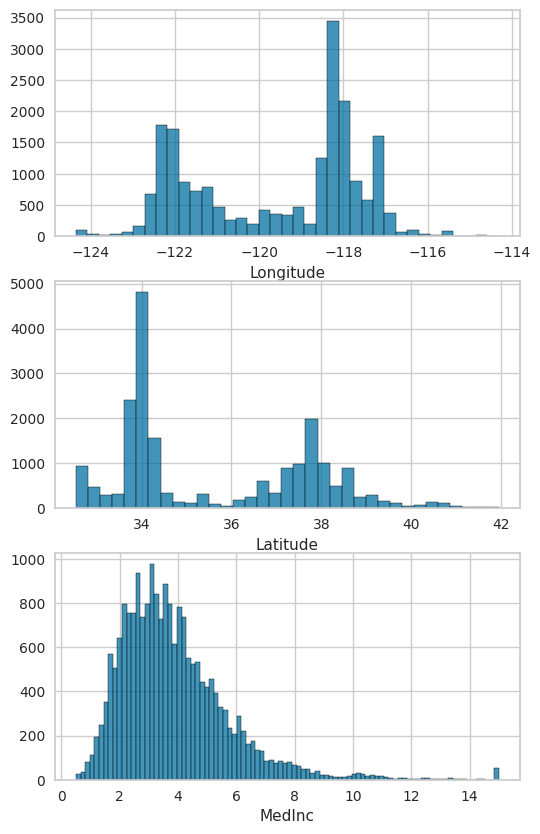

In [4]:
fig, axis = plt.subplots(3, figsize=(6,10 ))

sns.histplot(ax=axis[0], data=df, x='Longitude').set(ylabel=None)
sns.histplot(ax=axis[1], data=df, x='Latitude').set(ylabel=None)
sns.histplot(ax=axis[2], data=df, x='MedInc').set(ylabel=None)


In [5]:
min_max_scaler = MinMaxScaler()  # Instancia de: from sklearn.preprocessing import MinMaxScaler

num_variables = ['Latitude', 'Longitude', 'MedInc']
min_max_features = min_max_scaler.fit_transform(df[num_variables])

df_min_max = pd.DataFrame(min_max_features,
                          index=df.index,
                          columns=num_variables)
df_min_max

,Latitude,Longitude,MedInc
0,0.567481,0.211155,0.539668
1,0.565356,0.212151,0.538027
2,0.564293,0.210159,0.466028
3,0.564293,0.209163,0.354699
4,0.564293,0.209163,0.230776
...,...,...,...
20635,0.737513,0.324701,0.073130
20636,0.738576,0.312749,0.141853
20637,0.732200,0.311753,0.082764
20638,0.732200,0.301793,0.094295


### Paso 2: Construye un K-Means
Clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means. A continuación, almacena el cluster al que pertenece cada casa como una columna nueva del dataset. Podrías llamarla cluster. Para introducirla a tu conjunto de datos quizá tengas que categorizarla. Observa qué formato y valores tiene y actúa en consecuencia. Grafícala en un diagrama de puntos y describe lo que ves.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

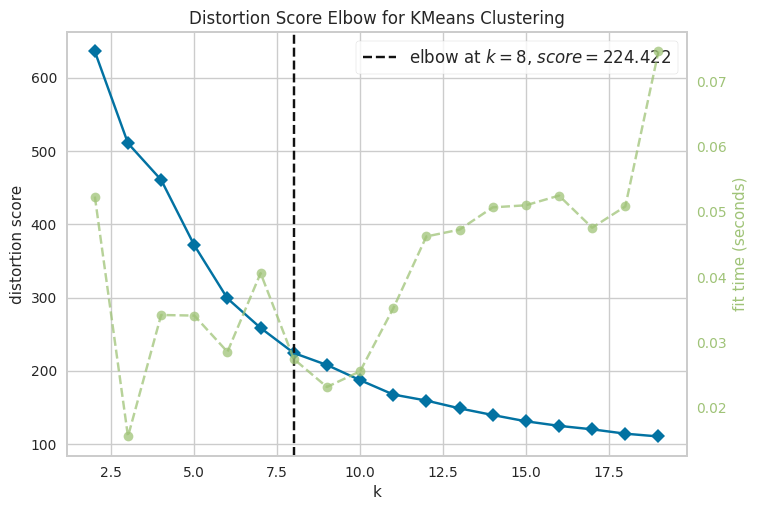

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
elbow_vis = KElbowVisualizer(KMeans(random_state=18), k=(2, 20))
elbow_vis.fit(df_min_max)
elbow_vis.show()

In [7]:
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(df_min_max)

cluster = model.predict(df_min_max)
df_min_max['cluster'] = cluster 

In [8]:
df_min_max

,Latitude,Longitude,MedInc,cluster
0,0.567481,0.211155,0.539668,4
1,0.565356,0.212151,0.538027,4
2,0.564293,0.210159,0.466028,4
3,0.564293,0.209163,0.354699,4
4,0.564293,0.209163,0.230776,1
...,...,...,...,...
20635,0.737513,0.324701,0.073130,5
20636,0.738576,0.312749,0.141853,5
20637,0.732200,0.311753,0.082764,5
20638,0.732200,0.301793,0.094295,5


In [9]:
X = df_min_max[['Longitude', 'Latitude', 'MedInc']]
y = df_min_max['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Longitude,Latitude,MedInc
14196,0.729084,0.018066,0.190322
8267,0.616534,0.130712,0.228452
17445,0.385458,0.225292,0.252162
14265,0.721116,0.015940,0.099488
2271,0.453187,0.450584,0.210638


In [10]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_pred_test

array([2, 2, 1, ..., 4, 2, 0], shape=(4128,), dtype=int32)

In [12]:
accuracy_train = (accuracy_score(y_train, y_pred_train))
                  
accuracy_test = (accuracy_score(y_test, y_pred_test))

accuracy = pd.DataFrame(data=[accuracy_train, accuracy_test],
                        columns=['RandomForest'],
                        index=['Train set', 'Test set'])
accuracy

,RandomForest
Train set,1.000000
Test set,0.995397
